In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.autograd import Variable
from copy import deepcopy
from collections import Counter
from copy import deepcopy as copy
from modules.matrixBLEU import mBLEU
from modules.utils import CUDA_wrapper 
from modules.toyExperimentUtils import *

# Toy experiment 

Here we will implement described in article. We will try optimize $t$ matrix by minimizing expectedBLEU (see ```training``` function)

* Elements of matrix $t$ are generated by sampling logits from $N(0,1)$ and then $softmax$ function is applied row-wise to obtain probability distribution for words.
* Indexes of reference text $r$ are generated by uniform sampling with replacement from vocabulary.


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


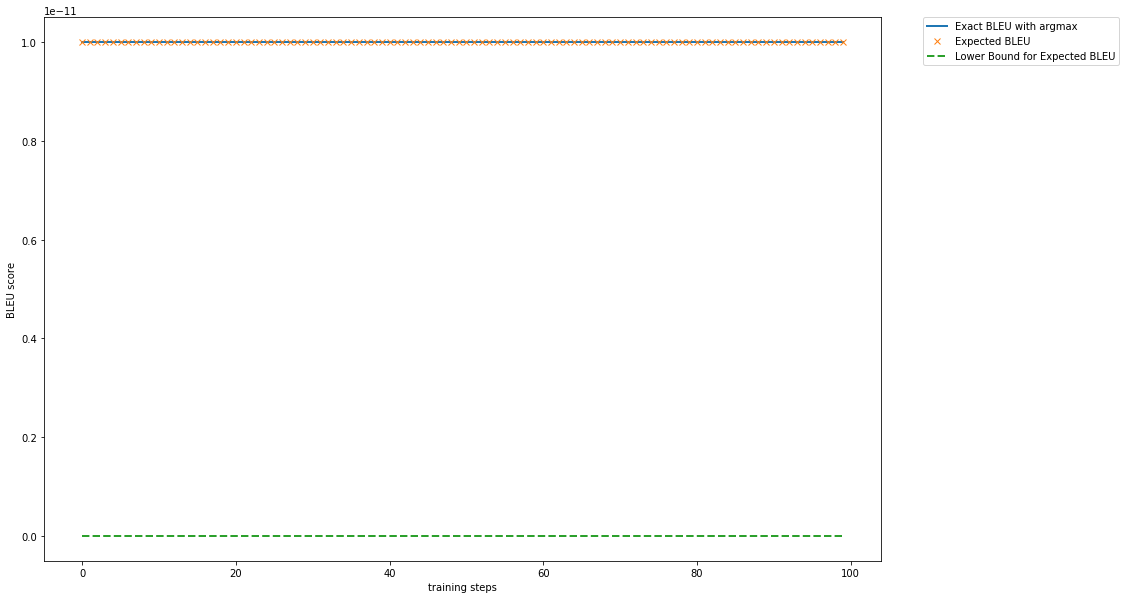

/home/vzhukov/Documents/work/expected_bleu/modules/expectedBLEU.py:80: RuntimeWarning: divide by zero encountered in log
  return overlap_lower_bound(t, r_hot, r, f, temp, n) - np.log(t.size()[0] - n  + 1)


[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


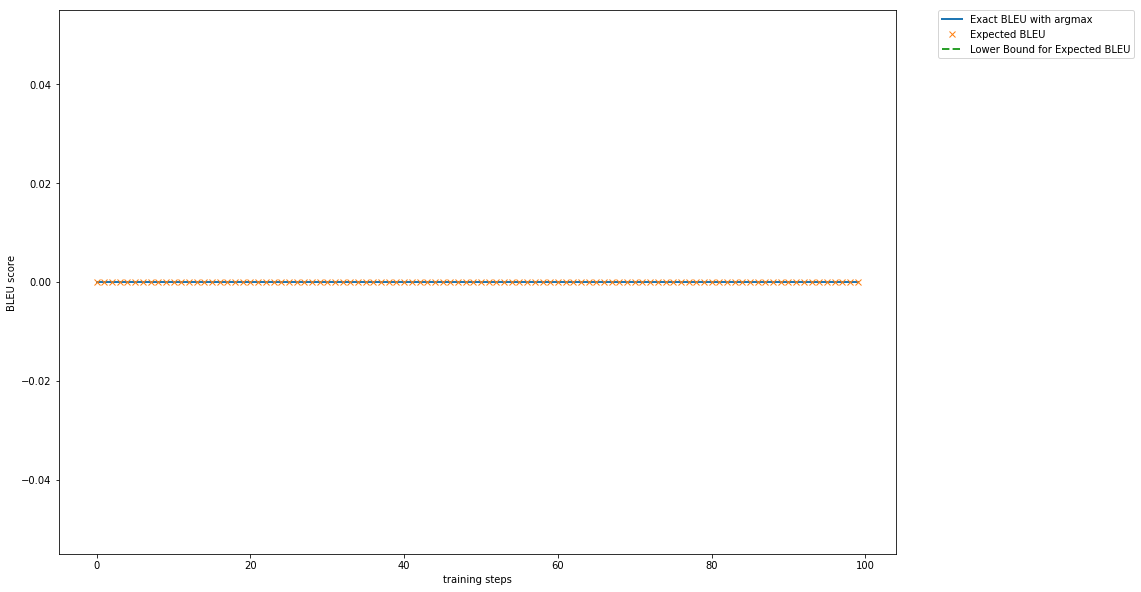

/home/vzhukov/Documents/work/expected_bleu/modules/expectedBLEU.py:80: RuntimeWarning: invalid value encountered in log
  return overlap_lower_bound(t, r_hot, r, f, temp, n) - np.log(t.size()[0] - n  + 1)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


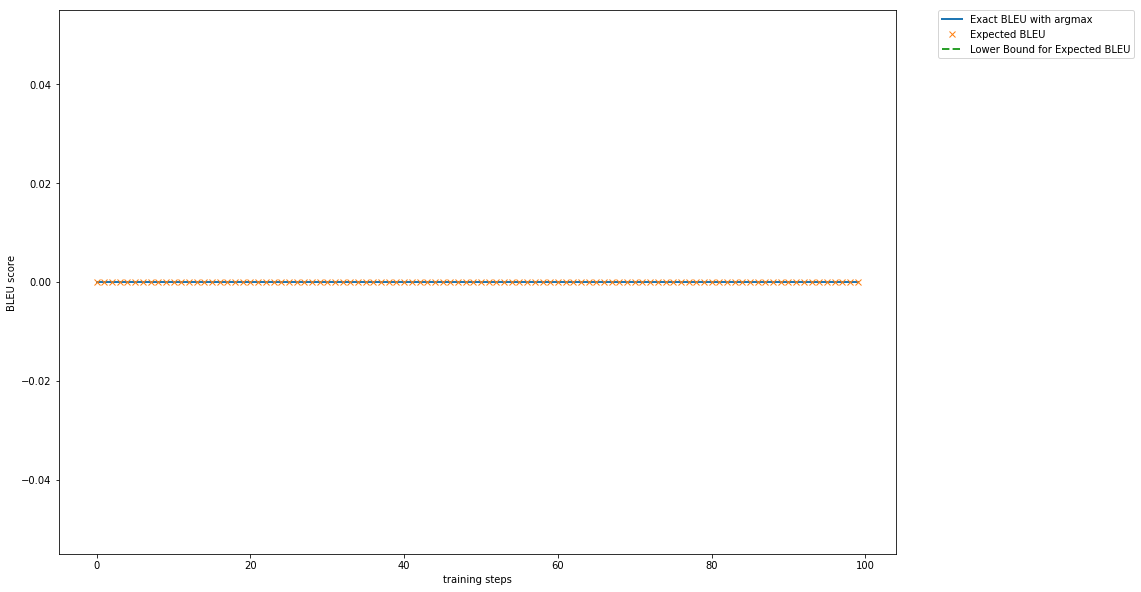

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


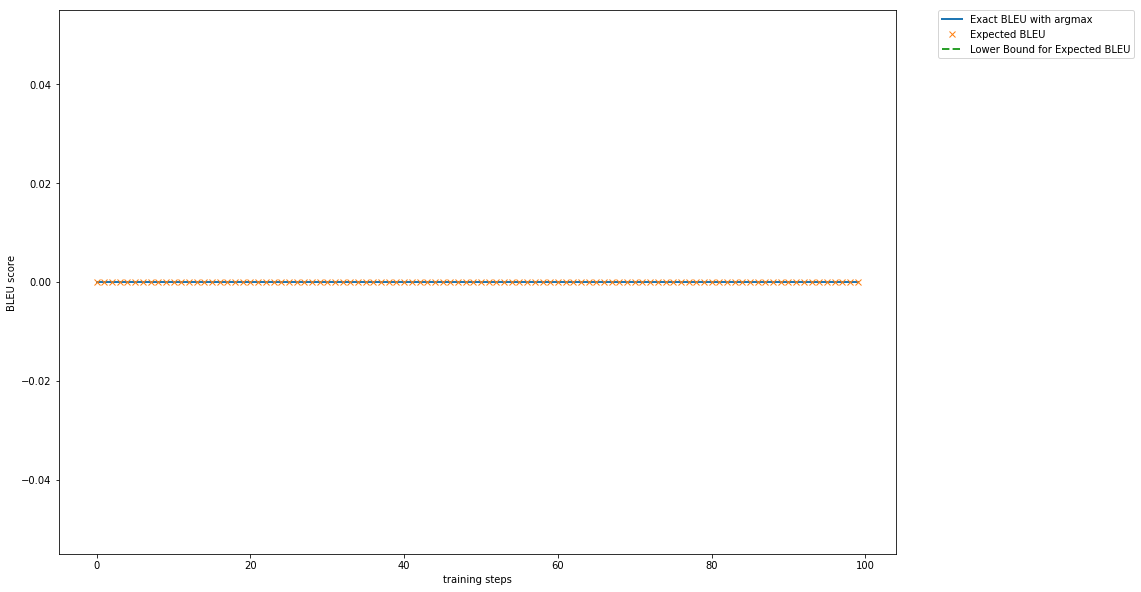

In [3]:
precisions = []
all_bleus = []
all_bst = []
for n in range(1, 5):
    vocab_size = int(100)
    length = 1
    f = nn.Softmax()
    words = np.random.choice(vocab_size, size=length, replace = True)
    t = Variable(CUDA_wrapper(torch.randn((length, vocab_size))), requires_grad=True)
    r = torch.LongTensor(words)
    r_hot = Variable(CUDA_wrapper(one_hots((length, vocab_size), words)))
    r = Variable(CUDA_wrapper(r), requires_grad=False)
    mbleu = mBLEU(max_order=n, softmax_temperature=0.00001)
    res, bleus, probs, gradients = training(t, r_hot, r, f, n, mbleu)
    bst = estimate_expectation(r_hot, probs, mbleu, length, n_exp=1) # !!!!!!!TODO
    precisions.append(res)
    all_bleus.append(bleus)
    all_bst.append(bst)
#     print(res[-1])
#     print(bst)
    print(res)
    plot_results(bleus, bst, res)

In [4]:
grad_norms = [torch.norm(i).data[0] for i in gradients]

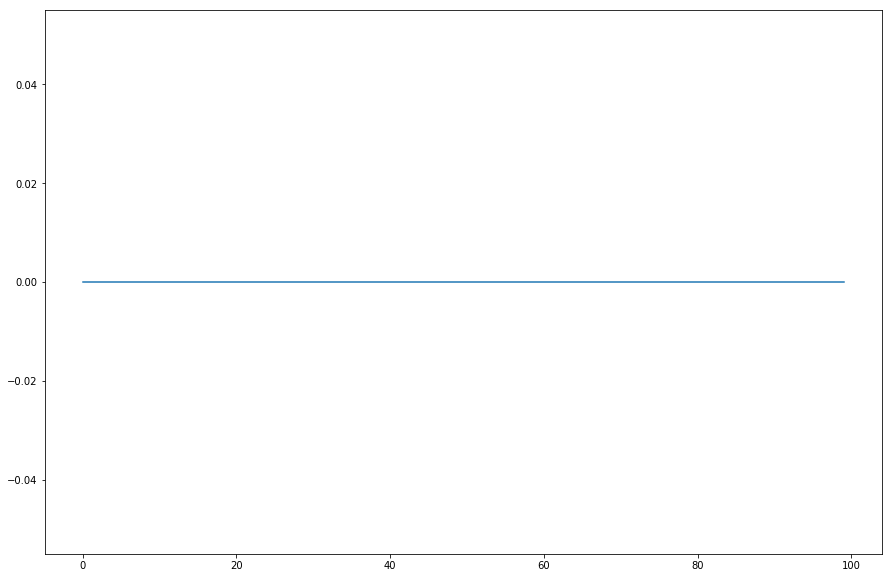

In [5]:
plt.plot(grad_norms)